## test trad stab

bottom 29
top 48
right 44
left 10


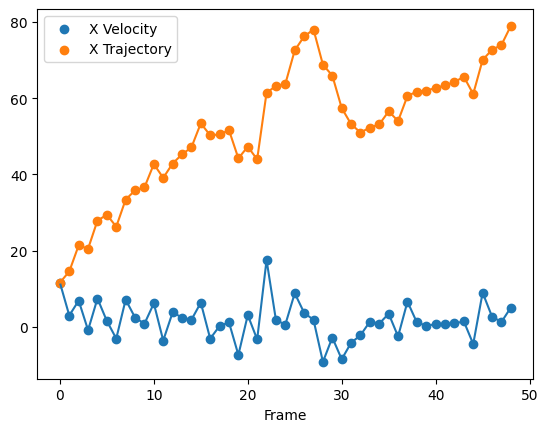

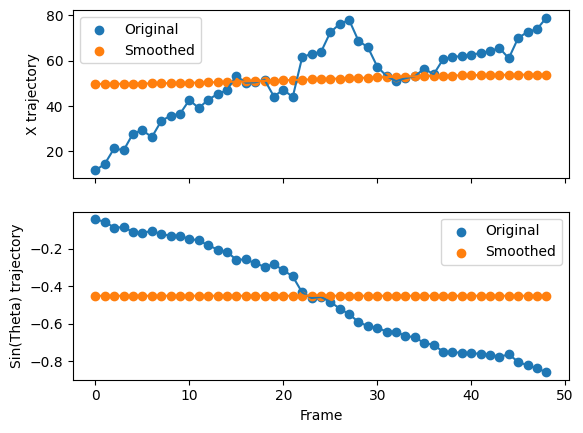

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from stabilize import *
import glob
from natsort import natsorted

#load the images and create a plot of the trajectory
# imgs, name = load_images('octo_sampling_org.mp4', OUT_PATH='ou/'), 'result1'
name = 'result1'
imgs = []
for im in natsorted((glob.glob("out/*"))):
    imgs.append(cv2.imread(im))



ws = create_warp_stack(imgs)

i,j = 0,2
plt.scatter(np.arange(len(ws)), ws[:,i,j], label='X Velocity')
plt.plot(np.arange(len(ws)), ws[:,i,j])
plt.scatter(np.arange(len(ws)), np.cumsum(ws[:,i,j], axis=0), label='X Trajectory')
plt.plot(np.arange(len(ws)), np.cumsum(ws[:,i,j], axis=0))
plt.legend()
plt.xlabel('Frame')
plt.savefig(name+'_trajectory.png')

#calculate the smoothed trajectory and output the zeroed images
smoothed_warp, smoothed_trajectory, original_trajectory = moving_average(ws, sigma_mat= np.array([[1000,15, 10],[15,1000, 10]]))
new_imgs = apply_warping_fullview(images=imgs, warp_stack=ws-smoothed_warp, PATH='./ou/')

#plot the original and smoothed trajectory
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})

i,j = 0,2
a0.scatter(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j], label='Original')
a0.plot(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j])
a0.scatter(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j], label='Smoothed')
a0.plot(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j])
a0.legend()
a0.set_ylabel('X trajectory')
a0.xaxis.set_ticklabels([])

i,j = 0,1
a1.scatter(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j], label='Original')
a1.plot(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j])
a1.scatter(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j], label='Smoothed')
a1.plot(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j])
a1.legend()
a1.set_xlabel('Frame')
a1.set_ylabel('Sin(Theta) trajectory')
plt.savefig(name+'_smoothed.png')

#create a images that show both the trajectory and video frames
# filenames = imshow_with_trajectory(images=new_imgs, warp_stack=ws-smoothed_warp, PATH='ou'+'/', ij=(0,2))

#create gif
create_gif(filenames, './'+name+'.gif')

# modified

In [22]:
import cv2 , os
from natsort import natsorted
import numpy as np
import matplotlib.pyplot as plt
from stabilize import *
import glob


def trad_stab(imgs ):
    ws = create_warp_stack(imgs)
    smoothed_warp, smoothed_trajectory, original_trajectory = moving_average(ws, sigma_mat= np.array([[1000,15, 10],[15,1000, 10]]))
    return  apply_warping_fullview(images=imgs, warp_stack=ws-smoothed_warp)







# Read all frame filenames from the directory
sorted_items = glob.glob("navid/*")
# print(imgs[11].shape)
sorted_items = natsorted(sorted_items)

imgs = []
for filename in sorted_items:
    frame = cv2.imread(filename)
    imgs.append(frame)


# final_imgs = [imgs[0]]
# for i in range(1,len(imgs),5):
#     print("******** " , i,i+5)
#     last_im = final_imgs.pop()
#     if i+6 >= len(imgs):
#         print(i , i , i)
#         final_imgs+=trad_stab([last_im] + imgs[i:len(imgs)])
#     else:
#         final_imgs+=trad_stab([last_im] + imgs[i:i+6])


final_imgs=trad_stab(  imgs + imgs[:10])

c= 0 
for im in final_imgs:
    cv2.imwrite(f"navid_out/{str(c)}.jpg" , im)
    c+=1






fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter("navid_out/navid_rec.mp4", fourcc,8, (final_imgs[0].shape[1], final_imgs[0].shape[0]))

# Write frames to the video
for frame in final_imgs:
   video.write(frame)

# Release the video writer and destroy any remaining windows
video.release()
cv2.destroyAllWindows()



bottom 58
top 53
right 29
left 58


In [ ]:
    # Define the video codec, output format, and frame rate
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter("navid_out/navid6.mp4", fourcc, 8, (new_imgs[0].shape[1], new_imgs[0].shape[0]))

# Write frames to the video
for frame in new_imgs:
   video.write(frame)

# Release the video writer and destroy any remaining windows
video.release()
cv2.destroyAllWindows()

## find-out algorithm


In [26]:
a1 = cv2.imread("out/05.jpg")
a2 = cv2.imread("out/06.jpg")
get_homography(a1, a2) + get_homography(a2, a1)

array([[ 1.9993360e+00,  1.0326672e-03,  4.2160511e-02],
       [-1.0326672e-03,  1.9993360e+00,  5.2060986e-01]], dtype=float32)

In [25]:
get_homography(a2, a1)

array([[ 0.99965465,  0.02627809, -7.366573  ],
       [-0.02627809,  0.99965465, 13.3777275 ]], dtype=float32)